In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Read in Data

I scraped a list of wine notes from Wikipedia. https://en.wikipedia.org/wiki/Wine_tasting_descriptors. Unfortunately, I did not save the code I used to scrape the data (and I am kicking myself now that I can't show it off!). I saved the data in the file "Wine_Notes.csv" and created a list called "notes" that is a list of wine notes.

In [46]:
notes_csv = pd.read_csv("Wine_Notes.csv")
data = pd.read_csv("winemag-data-130k-v2.csv")
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [47]:
notes = ["".join(x).lower() for x in notes_csv.values.tolist()]

### Use this list to create a new dataframe of wine descriptors

This has each note as a column, and each wine as a row. If the note appears in the description, the value for that row is 1, otherwise it is 0.

In [48]:
def descriptor_counter(description):
    """ Returns a dictionary {descriptor : count}"""
    
    counter_dict = dict()
    for descriptor in notes:
        counter_dict[descriptor] = 0
        if descriptor in description.lower():
            counter_dict[descriptor] += 1
    return counter_dict

In [49]:
data["descriptors"] = data["description"].apply(descriptor_counter)

In [50]:
descriptor_df = pd.DataFrame(list(data["descriptors"]), index = data["title"])

In [51]:
descriptor_df.columns

Index(['aftertaste', 'alcoholic', 'aroma', 'astringent', 'autolytic', 'baked',
       'balanced', 'big', 'bitter', 'body', 'bouquet', 'brilliance', 'buttery',
       'chewy', 'chocolaty', 'closed', 'cloying', 'coarse', 'complex',
       'concentrated', 'connected', 'corked', 'crisp', 'depth', 'dirty', 'dry',
       'earthy', 'elegant', 'expressive', 'extracted', 'fallen over', 'fat',
       'finesse', 'finish', 'firm', 'flabby', 'flat', 'foxy', 'fresh', 'fruit',
       'full', 'grassy', 'green', 'hard', 'heavy', 'herbal', 'herbaceous',
       'hollow', 'hot', 'jammy', 'lean', 'leathery', 'legs', 'musty', 'nose',
       'oaky', 'oxidized', 'oxidative', 'petrolly', 'powerful', 'raisiny',
       'reticent', 'rich', 'rough', 'round', 'smokey', 'smooth', 'soft',
       'sour', 'spicy', 'supple', 'sweet', 'tannic', 'tar', 'tart', 'toasty',
       'transparency', 'typicity', 'vanillin', 'vegetal', 'vinegary'],
      dtype='object')

In [52]:
# Drop columns that don't show up in the data at all. 
drop_list = []
for col in descriptor_df.columns:
    if descriptor_df[col].sum() == 0:
        drop_list.append(col)
drop_list

['fallen over']

In [53]:
descriptor_df.drop("fallen over", axis = 1, inplace = True)

## Create a dataframe that displays price if that row has that descriptor

i.e. replace the zeros with NaN and the ones withe the price.

In [54]:
with_price = descriptor_df.merge(data["price"], left_index = True, right_on = data["title"])
with_price.replace(np.nan, 0, inplace = True)
price_list = [int(price) for price in with_price["price"]]

In [55]:
# Replace "1" with price
with_price = with_price.mul(price_list, axis = 0)

# Convert 0 to NaN
with_price.replace(0, np.nan, inplace=True)

In [56]:
# remove key_0 and price cols
desc_cost = with_price.drop("key_0", axis = 1).drop("price", axis = 1)
desc_cost.head()

,aftertaste,alcoholic,aroma,astringent,autolytic,baked,balanced,big,bitter,body,...,sweet,tannic,tar,tart,toasty,transparency,typicity,vanillin,vegetal,vinegary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
## Double check - I don't think I ended up doing this.

# Remove cols with less than 30 observations
count_list = []
for col in desc_cost.columns:
    count = desc_cost[col].count()
    count_list.append((col, count))

remove_list = []
for desc in count_list:
    if desc[1] < 31:
        remove_list.append(desc)

remove_list

[('brilliance', 17),
 ('connected', 26),
 ('corked', 9),
 ('dirty', 22),
 ('musty', 15),
 ('petrolly', 5),
 ('smokey', 23),
 ('transparency', 17),
 ('vinegary', 22)]

## Create scatterplot of price by wine note
While this code does work, it unfortunately takes too long to load. The idea was to have a list of wine descriptors on the bottom, then a point above each descriptor at the price. 

In [58]:
# I did not end up using this code because it took to long to load. 

# df = pd.DataFrame([(colname, desc_cost[colname][i]) for i in range(len(desc_cost)) for colname in desc_cost.columns], 
#                  columns=['col', 'values'])

# sns.stripplot(x = 'col', y='values', data=df)

## Create a barchart of median price by note
Since the code above took to long, I decided to use median price for each note, then created a bar chart. 

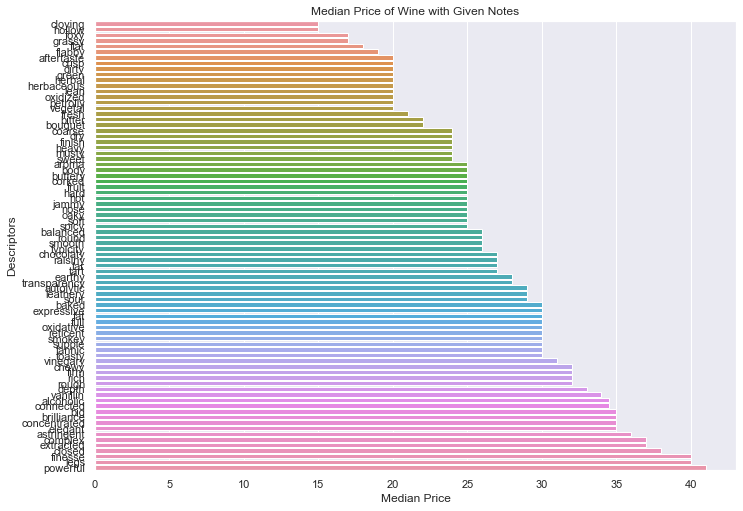

In [59]:
def Sort_Tuple(tup):  
    """Sort a list of tuples by the second element"""
    tup.sort(key = lambda x: x[1])  
    return tup

tuple_list = [(col, desc_cost[col].median()) for col in desc_cost.columns]
Sort_Tuple(tuple_list)

median_df = pd.DataFrame(tuple_list, columns = ['Descriptors', 'Median Price'])

g = sns.barplot(x='Median Price', y = 'Descriptors', data=median_df)
g.set_title("Median Price of Wine with Given Notes")
sns.set(rc={'figure.figsize':(20,15)})

## Create a barchart of median value by note

This is the same thing as above, but this time I am using the "values" that my partner came up with. The value is the "bang for your buck" so to speak. It is a ratio of price to value. 

In [60]:
wine_value = pd.read_csv("Wine_Value.csv")

In [61]:
with_value = descriptor_df.merge(wine_value["value"], left_index = True, right_on = wine_value["title"])
with_value.replace(np.nan, 0, inplace = True)
value_list = [int(val) for val in with_value["value"]]


# Replace "1" with price
with_value = with_value.mul(value_list, axis = 0)

# Convert 0 to NaN
with_value.replace(0, np.nan, inplace=True)

# remove key_0 and price cols
desc_val = with_value.drop("key_0", axis = 1).drop("value", axis = 1)
desc_val.head()

,aftertaste,alcoholic,aroma,astringent,autolytic,baked,balanced,big,bitter,body,...,sweet,tannic,tar,tart,toasty,transparency,typicity,vanillin,vegetal,vinegary
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


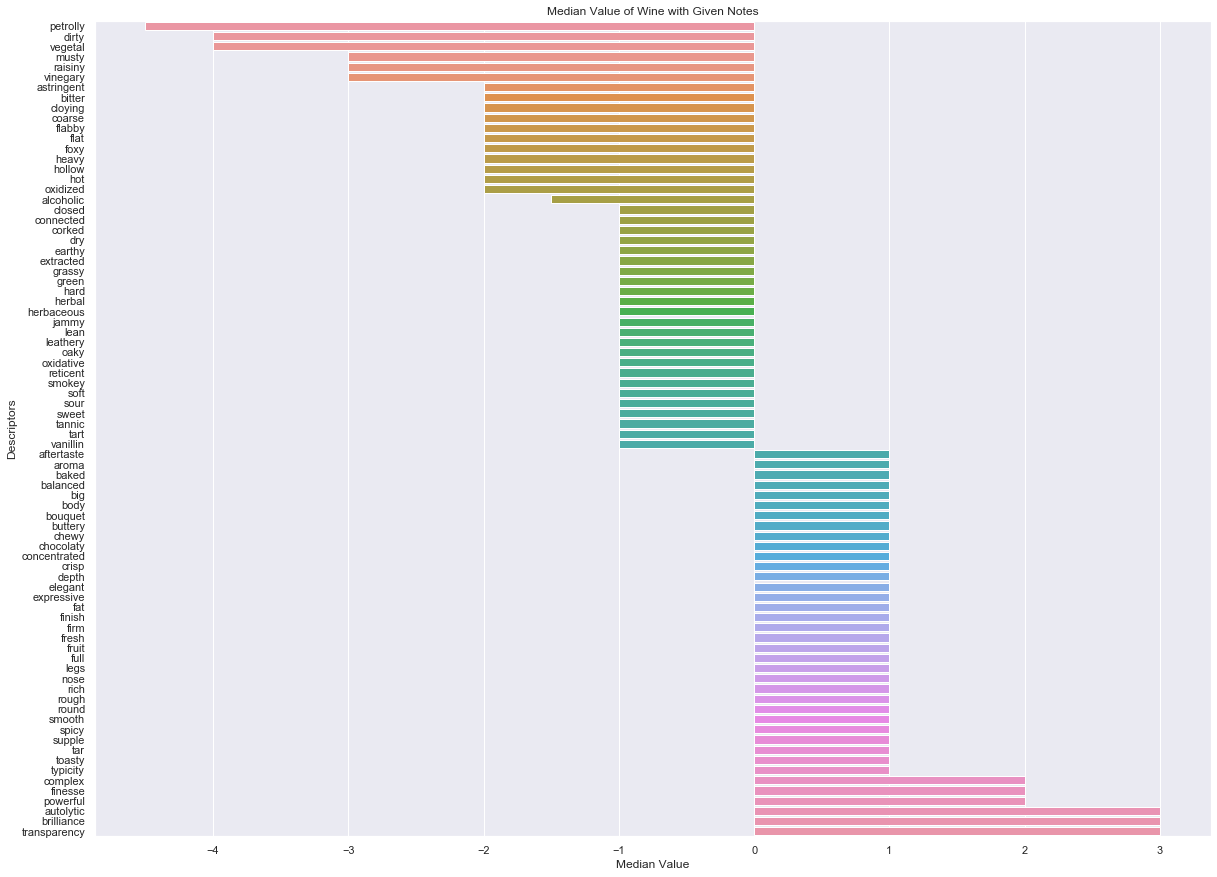

In [62]:
tuple_list = [(col, desc_val[col].median()) for col in desc_val.columns]
Sort_Tuple(tuple_list)

median_val_df = pd.DataFrame(tuple_list, columns = ['Descriptors', 'Median Value'])
median_val_df.head()

g = sns.barplot(x='Median Value', y = 'Descriptors', data=median_val_df)
g.set_title("Median Value of Wine with Given Notes")
sns.set(rc={'figure.figsize':(8,13)})

## For fun, let's look at a wordcloud of the description

Wordclouds are not very scientific, but they can give a quick overview of which words are most prevalent. I started with a word cloud of all the words in the descriptions. 

In [63]:
description_string = ""
for word in data["description"]:
    description_string += word

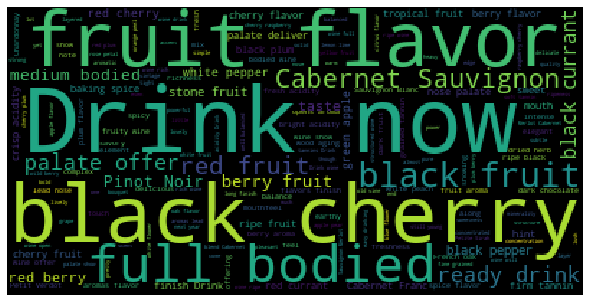

In [64]:
#wordcloud of all words
wordcloud = WordCloud().generate(description_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Next I created a wordcloud that contains only descriptors.

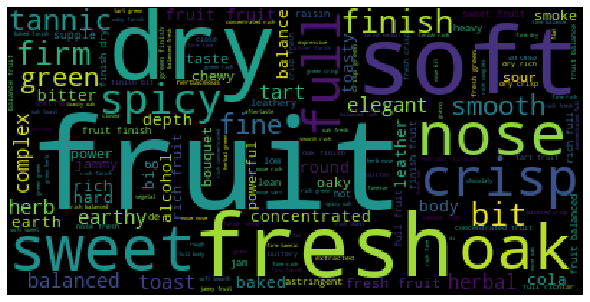

In [65]:
#wordcloud of only descriptors in description

descriptor_cols = " ".join(descriptor_df.columns)
description_list = list(description_string.split(" "))

allwords = []

for word in description_list:
    if word in descriptor_cols:
        allwords.append(word)

words = " ".join(allwords)

wordcloud = WordCloud().generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Look at these stats!

First, I looked only at median prices for the wine descriptors. The median of our medians is 26. I want to know which descriptors fall 2 standard deviations above or below our median. There are not any obvious outliers in the histogram. 

count    80.00000
mean     27.11250
std       6.08327
min      15.00000
25%      24.00000
50%      26.00000
75%      30.25000
max      41.00000
Name: Median Price, dtype: float64


Text(0.5, 1.0, 'Histogram of Median Price')

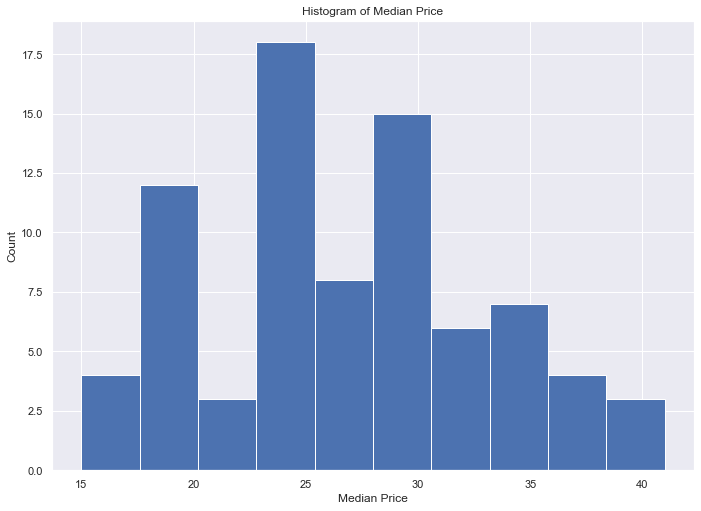

In [66]:
print(median_df["Median Price"].describe())
sns.set(rc={'figure.figsize':(11.5,8.27)})
median_df["Median Price"].hist()
plt.xlabel('Median Price')
plt.ylabel('Count')
plt.title(r'Histogram of Median Price')

In [67]:
wine_sd = median_df["Median Price"].describe()[2]
wine_median = median_df["Median Price"].describe()[5]

In [68]:
extreme_descriptors = []
for tup in tuple_list:
    if tup[1] > wine_median + (wine_sd*2):
        extreme_descriptors.append(tup)
    if tup[1] < wine_median - (wine_sd*2):
        extreme_descriptors.append(tup)
        
extreme_descriptors #none 2 sd below median

[('petrolly', -4.5),
 ('dirty', -4.0),
 ('vegetal', -4.0),
 ('musty', -3.0),
 ('raisiny', -3.0),
 ('vinegary', -3.0),
 ('astringent', -2.0),
 ('bitter', -2.0),
 ('cloying', -2.0),
 ('coarse', -2.0),
 ('flabby', -2.0),
 ('flat', -2.0),
 ('foxy', -2.0),
 ('heavy', -2.0),
 ('hollow', -2.0),
 ('hot', -2.0),
 ('oxidized', -2.0),
 ('alcoholic', -1.5),
 ('closed', -1.0),
 ('connected', -1.0),
 ('corked', -1.0),
 ('dry', -1.0),
 ('earthy', -1.0),
 ('extracted', -1.0),
 ('grassy', -1.0),
 ('green', -1.0),
 ('hard', -1.0),
 ('herbal', -1.0),
 ('herbaceous', -1.0),
 ('jammy', -1.0),
 ('lean', -1.0),
 ('leathery', -1.0),
 ('oaky', -1.0),
 ('oxidative', -1.0),
 ('reticent', -1.0),
 ('smokey', -1.0),
 ('soft', -1.0),
 ('sour', -1.0),
 ('sweet', -1.0),
 ('tannic', -1.0),
 ('tart', -1.0),
 ('vanillin', -1.0),
 ('aftertaste', 1.0),
 ('aroma', 1.0),
 ('baked', 1.0),
 ('balanced', 1.0),
 ('big', 1.0),
 ('body', 1.0),
 ('bouquet', 1.0),
 ('buttery', 1.0),
 ('chewy', 1.0),
 ('chocolaty', 1.0),
 ('concentra

Wines with the descriptors "finesse", "legs", and "powerful" have median prices two standard deviations above the mean median price. 

In [69]:
print("Finesse has", len(desc_cost['finesse']) - np.isnan(desc_cost['finesse']).sum(), "observations.")
print("Legs has", len(desc_cost['legs']) - np.isnan(desc_cost['legs']).sum(), "observations.")
print("Powerful has", len(desc_cost['powerful']) - np.isnan(desc_cost['powerful']).sum(), "observations.")

Finesse has 832 observations.
Legs has 64 observations.
Powerful has 3032 observations.


Each of these descriptors has a large number of observations. This makes me inclined to beleive that the large price is not due to chance, but I would need to run regressions to be sure. 

## That was median price data. Below is analysis all price data. 

The median prices may stand out, but does this hold up when we compare each wine to the prices of all wines? I have looked at absolute prices and log-scaled prices.

In [70]:
data["price"].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [71]:
log_price = [math.log(price) for price in data["price"]]
print(pd.Series(log_price).describe())

median_log_price = [math.log(price) for price in median_df["Median Price"]]
print(pd.Series(median_log_price).describe())

wine_log_sd = pd.Series(median_log_price).describe().describe()[2]
wine_log_median = pd.Series(median_log_price).describe().describe()[5]

count    120975.000000
mean          3.314636
std           0.654040
min           1.386294
25%           2.833213
50%           3.218876
75%           3.737670
max           8.101678
dtype: float64
count    80.000000
mean      3.274344
std       0.230731
min       2.708050
25%       3.178054
50%       3.258097
75%       3.409395
max       3.713572
dtype: float64


In [72]:
extreme_descriptors = []
for tup in tuple_list:
    if tup[1] > wine_median + (wine_log_sd*2):
        extreme_descriptors.append(tup)
    if tup[1] < wine_median - (wine_log_sd*2):
        extreme_descriptors.append(tup)
        
extreme_descriptors

[]

In [73]:
extreme_log_descriptors = []
for tup in tuple_list:
    if tup[1] > wine_log_median + (wine_log_sd*2):
        extreme_log_descriptors.append(tup)
    if tup[1] < wine_log_median - (wine_log_sd*2):
        extreme_log_descriptors.append(tup)
        
extreme_log_descriptors

[]

As you can see, we no longer have any significant observations. This indicates that a particular wine descriptor may not have an impact on price. Again, regression would be needed to confirm this theory, but this exploratory data analysis does not indicate a strong relationship. 